In [4]:
import glob
import json
import pandas as pd

# Define the path to the folder containing our JSON files
path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'  # Adjust as needed

# Initialize an empty list to store all the stroke data
all_strokes = []

# Loop through the found files
for file_name in glob.glob(path_to_json):
    print(f"Processing file: {file_name}")  # Print the file name being processed
    with open(file_name, 'r') as file:
        data = json.load(file)
        # Check if the data is in the expected format (i.e if contains 'strokes' key)
        if 'strokes' in data:
            strokes = data['strokes']
            for stroke in strokes:
                stroke['filename'] = file_name  # Add filename to each stroke record
                all_strokes.append(stroke)
        else:
            print(f"Unexpected data format in {file_name}")

# Convert the list of strokes to a DataFrame
df = pd.DataFrame(all_strokes)

# Display the first few rows to understand what the data looks like
print(df.head())

# Analyze the distribution of labels if 'label' is a key in the dictionary
if 'label' in df.columns:
    label_counts = df['label'].value_counts()
    print("Label Distribution:")
    print(label_counts)

# Display total number of examples
print(f"Total number of examples: {len(df)}")

# Save the combined data to a new JSON file
df.to_json('/Users/nely/Desktop/TinyML/Project/combined_gesture_data.json', orient='records')

print("Entries from nelyromo.json:", df[df['filename'].str.contains("nelyromo.json")].shape[0])
print("Entries from nelyromo2.json:", df[df['filename'].str.contains("nelyromo2.json")].shape[0])



Processing file: /Users/nely/Desktop/TinyML/Project/combined_gesture_data.json
Unexpected data format in /Users/nely/Desktop/TinyML/Project/combined_gesture_data.json
Processing file: /Users/nely/Desktop/TinyML/Project/nelyromo2.json
Processing file: /Users/nely/Desktop/TinyML/Project/nelyromo.json
   index                                       strokePoints label  \
0      0  [{'x': 0.1015625, 'y': -0.1484375}, {'x': 0.10...     0   
1      1  [{'x': 0.0546875, 'y': -0.171875}, {'x': 0.054...     0   
2      2  [{'x': 0.1953125, 'y': -0.09375}, {'x': 0.1875...     0   
3      3  [{'x': -0.109375, 'y': 0.1953125}, {'x': -0.10...     0   
4      4  [{'x': -0.0703125, 'y': -0.140625}, {'x': -0.0...     0   

                                            filename  
0  /Users/nely/Desktop/TinyML/Project/nelyromo2.json  
1  /Users/nely/Desktop/TinyML/Project/nelyromo2.json  
2  /Users/nely/Desktop/TinyML/Project/nelyromo2.json  
3  /Users/nely/Desktop/TinyML/Project/nelyromo2.json  
4  /Users/

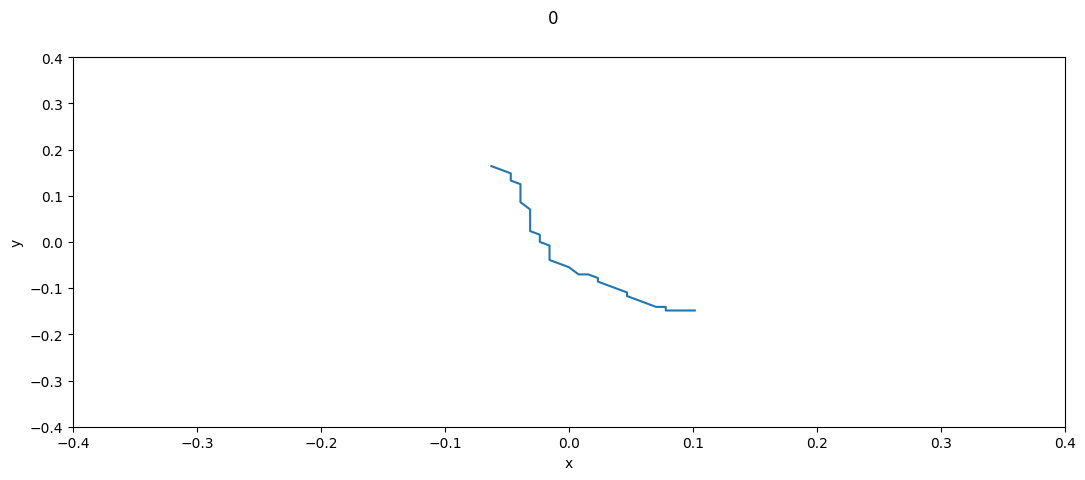

In [5]:
import glob
import json
from pathlib import Path

import matplotlib.pyplot as plt

def plot_stroke(stroke):
    x_array = [coords["x"] for coords in stroke["strokePoints"]]
    y_array = [coords["y"] for coords in stroke["strokePoints"]]

    fig = plt.figure(figsize=(12.8, 4.8))
    fig.suptitle(stroke["label"])

    ax = fig.add_subplot(111)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-0.4, 0.4)
    ax.set_ylim(-0.4, 0.4)
    ax.plot(x_array, y_array)

    plt.show()

path_to_json = '/Users/nely/Desktop/TinyML/Project/*.json'
json_files = glob.glob(path_to_json)

strokes = []
for filename in json_files:
    with open(filename, "r") as file:
        file_contents = file.read()
    file_data = json.loads(file_contents)
    for stroke in file_data:
        # Store each stroke along with its filename in a dictionary
        strokes.append({"stroke": stroke, "filename": filename})

# Example usage of plot_stroke function with the first stroke
if strokes:
    plot_stroke(strokes[0]["stroke"])
else:
    print("No strokes found.")


In [10]:
if strokes and len(strokes) > 11:
    print("Stroke content:", strokes[11]["stroke"])
else:
    print("No stroke found or stroke index out of range.")


Stroke content: {'index': 13, 'strokePoints': [{'x': -0.046875, 'y': -0.140625}, {'x': -0.046875, 'y': -0.140625}, {'x': -0.0546875, 'y': -0.140625}, {'x': -0.0546875, 'y': -0.140625}, {'x': -0.0625, 'y': -0.140625}, {'x': -0.0625, 'y': -0.140625}, {'x': -0.0703125, 'y': -0.140625}, {'x': -0.078125, 'y': -0.140625}, {'x': -0.078125, 'y': -0.140625}, {'x': -0.0859375, 'y': -0.1328125}, {'x': -0.0859375, 'y': -0.1328125}, {'x': -0.09375, 'y': -0.140625}, {'x': -0.09375, 'y': -0.1328125}, {'x': -0.1015625, 'y': -0.1328125}, {'x': -0.1015625, 'y': -0.1328125}, {'x': -0.109375, 'y': -0.1328125}, {'x': -0.109375, 'y': -0.1328125}, {'x': -0.109375, 'y': -0.1328125}, {'x': -0.1171875, 'y': -0.125}, {'x': -0.1171875, 'y': -0.125}, {'x': -0.1171875, 'y': -0.1171875}, {'x': -0.1171875, 'y': -0.109375}, {'x': -0.1171875, 'y': -0.1015625}, {'x': -0.109375, 'y': -0.0859375}, {'x': -0.09375, 'y': -0.0625}, {'x': -0.0703125, 'y': -0.03125}, {'x': -0.0390625, 'y': 0}, {'x': -0.0078125, 'y': 0.0234375},

In [15]:
# Assuming you have the 'strokes' variable loaded as before
gesture_data = strokes[11]["stroke"]

# Print the type of gesture_data to understand its structure
print(type(gesture_data))

# If it's a dictionary, print its keys
if isinstance(gesture_data, dict):
    print(gesture_data.keys())

# If it's small enough, you can also print the entire content to see the structure
print(gesture_data)


<class 'dict'>
dict_keys(['index', 'strokePoints', 'label', 'filename'])
{'index': 13, 'strokePoints': [{'x': -0.046875, 'y': -0.140625}, {'x': -0.046875, 'y': -0.140625}, {'x': -0.0546875, 'y': -0.140625}, {'x': -0.0546875, 'y': -0.140625}, {'x': -0.0625, 'y': -0.140625}, {'x': -0.0625, 'y': -0.140625}, {'x': -0.0703125, 'y': -0.140625}, {'x': -0.078125, 'y': -0.140625}, {'x': -0.078125, 'y': -0.140625}, {'x': -0.0859375, 'y': -0.1328125}, {'x': -0.0859375, 'y': -0.1328125}, {'x': -0.09375, 'y': -0.140625}, {'x': -0.09375, 'y': -0.1328125}, {'x': -0.1015625, 'y': -0.1328125}, {'x': -0.1015625, 'y': -0.1328125}, {'x': -0.109375, 'y': -0.1328125}, {'x': -0.109375, 'y': -0.1328125}, {'x': -0.109375, 'y': -0.1328125}, {'x': -0.1171875, 'y': -0.125}, {'x': -0.1171875, 'y': -0.125}, {'x': -0.1171875, 'y': -0.1171875}, {'x': -0.1171875, 'y': -0.109375}, {'x': -0.1171875, 'y': -0.1015625}, {'x': -0.109375, 'y': -0.0859375}, {'x': -0.09375, 'y': -0.0625}, {'x': -0.0703125, 'y': -0.03125}, {'x'

# 1. Define rules or criteria for recognizing each gesture. For swipe up, we would want to look for a stroke where the y-coordinate increases significantly from start to end. Similarly, we need to define rules for the other gestures.
# 2. Implement logic within the rasterize_stroke function to identify these gestures based on the stroke points provided before.
# 3. Modify the visualization part to distinguish between all different recognized gestures.

In [6]:
import math
import numpy as np

FIXED_POINT = 256

# we need to ensure the thresholds below are right
# Define constants for gesture recognition
SWIPE_THRESHOLD = 0.5  # Threshold for swipe gesture (in normalized units)
WAVE_AMPLITUDE_THRESHOLD = 0.3  # Threshold for hand wave gesture (in normalized units)
CLOCKWISE_THRESHOLD = 0.0  # Threshold for clockwise rotation (in radians)
COUNTERCLOCKWISE_THRESHOLD = 0.0  # Threshold for counterclockwise rotation (in radians)

def is_swipe_up(start_point, end_point):
    # Check if the stroke represents a swipe up gesture
    return end_point["y"] - start_point["y"] > SWIPE_THRESHOLD

def is_swipe_down(start_point, end_point):
    # Check if the stroke represents a swipe down gesture
    return start_point["y"] - end_point["y"] > SWIPE_THRESHOLD

def is_hand_wave(stroke_points):
    # Check if the stroke represents a hand wave gesture
    amplitude = max(abs(point["y"]) for point in stroke_points)
    return amplitude > WAVE_AMPLITUDE_THRESHOLD

def is_clockwise_rotation(stroke_points):
    # Check if the stroke represents a clockwise rotation
    # Analyzing the direction of the stroke points
    # Assuming clockwise rotation: if the x-coordinate increases significantly
    return stroke_points[-1]["x"] - stroke_points[0]["x"] > CLOCKWISE_THRESHOLD

def is_counterclockwise_rotation(stroke_points):
    # Check if the stroke represents a counterclockwise rotation
    # Similar to clockwise rotation, but in the opposite direction
    return stroke_points[0]["x"] - stroke_points[-1]["x"] > COUNTERCLOCKWISE_THRESHOLD

# Modify rasterize_stroke function to recognize gestures
def rasterize_stroke(stroke_points, x_range, y_range, width, height):
    pass


In [24]:
import numpy as np
import PIL.Image

def rasterize_gesture(gesture, label, width, height):
    num_channels = 3
    buffer_byte_count = height * width * num_channels
    buffer = bytearray(buffer_byte_count)

    # Define colors for different gestures
    colors = {
        "swipe_up": [255, 0, 0],        # Red
        "swipe_down": [0, 255, 0],      # Green
        "hand_wave": [0, 0, 255],       # Blue
        "clockwise": [255, 255, 0],     # Yellow
        "counterclockwise": [255, 0, 255]  # Magenta
    }

    color = colors.get(label, [0, 0, 0])  # Default to black if gesture not recognized

    for point_index in range(len(gesture) - 1):
        start_point = gesture[point_index]
        end_point = gesture[point_index + 1]
        start_x = int(start_point["x"] * width)
        start_y = int(start_point["y"] * height)
        end_x = int(end_point["x"] * width)
        end_y = int(end_point["y"] * height)

        # Bresenham's line algorithm to draw the gesture line
        dx = abs(end_x - start_x)
        dy = abs(end_y - start_y)
        sx = 1 if start_x < end_x else -1
        sy = 1 if start_y < end_y else -1
        err = dx - dy

        while start_x != end_x or start_y != end_y:
            if 0 <= start_x < width and 0 <= start_y < height:
                buffer_index = (start_y * width + start_x) * num_channels
                buffer[buffer_index:buffer_index + num_channels] = bytearray(color)

            e2 = 2 * err
            if e2 > -dy:
                err -= dy
                start_x += sx
            if e2 < dx:
                err += dx
                start_y += sy

    np_buffer = np.frombuffer(buffer, dtype=np.uint8).reshape(height, width, num_channels)
    return np_buffer

# Example usage:
gesture = [{"x": 0.1, "y": 0.2}, {"x": 0.3, "y": 0.4}]
raster = rasterize_gesture(gesture, "swipe_up", 32, 32)
image = PIL.Image.fromarray(raster).resize((512, 512), PIL.Image.NEAREST)
image.show()
